In [29]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [30]:
# timepoints to integrate over
t  = np.arange(0, 450, 0.01)

# membrane capacitance
membrane_cap = 1
# external current
i_ext = 10

# maximum condactances for Na, K and leak
max_conductance_k = 36
max_conductance_na = 120
leak_conductance = 0.3

# Nernst reversal potentials for Na, K and leak
k_revpot = -77
na_revpot = 50
leak_revpot = -54.387

# initial values for voltage, m, n, h
v0 = -65
m0 = 0.05
h0 = 0.6
n0 = 0.32

In [31]:
# channel gating kineatics (alpha and beta) for Na and K channels (include biological measurements)

def alpha_n(v):
    return 0.01 * (v + 55) / (1 - np.exp(-0.1 * (v + 55)))
      
                               
def alpha_m(v):
    return 0.1 * (v + 40) / (1 - np.exp(-0.1 * (v + 40)))
    
                              
def alpha_h(v):
    return 0.07 * np.exp(-0.05 * (v + 65))
    
                              
def beta_n(v):
    return 0.125 * np.exp(-0.0125 * (v + 65))

                              
def beta_m(v):
    return 4 * np.exp(-0.0556 * (v + 65))

                              
def beta_h(v):
    return 1 / (1 + np.exp (-0.1 * (v + 35)))

                              
# Na inactivation
def n_deriv(v, n):
    return alpha_n(v) * (1-n) - beta_n(v) * n

                              
# Na activation
def m_deriv(v, m):
    return alpha_m(v) * (1-m) - beta_m(v) * m


# K activation
def h_deriv(v, h):
    return alpha_h(v) * (1-h) - beta_h(v) * h


# membrane current for K channel
def k_current(voltage, n):
    return max_conductance_k * n ** 4 * (voltage - k_revpot)


# membrane current for Na channel
def na_current(voltage, m, h):
    return max_conductance_na * m ** 3 * h * (voltage - na_revpot)


# leak membrane current 
def leak_current(voltage):
    return leak_conductance * (voltage - leak_revpot)


# integrate membrane potential
def diff_eq(last_result, time):
    voltage, m, n, h = last_result
    
     # compute membrane currents for different channels
    i_k = k_current(voltage, n)
    i_na = na_current(voltage, m, h)
    i_leak = leak_current(voltage)
    
    # update voltage
    new_voltage = (i_ext - i_k - i_na - i_leak) / membrane_cap
    
    # update gating parameters
    new_m = m_deriv(voltage, m)
    new_n = n_deriv(voltage, n)
    new_h = h_deriv(voltage, h)
    
    return [new_voltage, new_m, new_n, new_h]
    

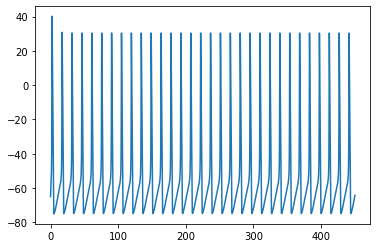

In [32]:
# inital values
last_result = [v0, m0, n0, h0]

# solve differential equation
result = odeint(diff_eq, last_result, t)
# extract computed voltages
voltages = result[:, 0]

# plot voltage trace over time
plt.plot(t, voltages)
plt.show()